<a href="https://colab.research.google.com/github/Nick7900/explore_data/blob/main/Explore_dataset_Nick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install pywaffle
# Visualize waffle plots
from pywaffle import Waffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
# basic libraries
import os
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import time

## Load data

In [30]:
# loading dat+a
#url = "https://raw.githubusercontent.com/Nick7900/stroke_data/main/healthcare-dataset-stroke-data.csv"
# dataset from Kaggle https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
!wget https://raw.githubusercontent.com/Nick7900/explore_data/main/data/healthcare-dataset-stroke-data.csv
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv', delimiter = ',', encoding = 'utf-8')

--2023-03-31 12:17:44--  https://raw.githubusercontent.com/Nick7900/explore_data/main/data/healthcare-dataset-stroke-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316972 (310K) [text/plain]
Saving to: ‘healthcare-dataset-stroke-data.csv.1’

healthcare-dataset- 100%[===================>] 309.54K  --.-KB/s    in 0.005s  

2023-03-31 12:17:44 (57.7 MB/s) - ‘healthcare-dataset-stroke-data.csv.1’ saved [316972/316972]



# Explore data

In [31]:
df.head(3).T

,0,1,2
id,9046,51676,31112
gender,Male,Female,Male
age,67.0,61.0,80.0
hypertension,0,0,0
heart_disease,1,0,1
ever_married,Yes,Yes,Yes
work_type,Private,Self-employed,Private
Residence_type,Urban,Rural,Rural
avg_glucose_level,228.69,202.21,105.92
bmi,36.6,NaN,32.5


## Info about data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Statistics of Categorical and Numerical Data

In [33]:
# stats of numerical data
round(df.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [34]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Handling missing values

In [35]:
# handling missing values
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Create labels of continous data

In [36]:
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,16,30,45,65,200], labels = ['Children', 'Young Adults','Mid Adults','Old Adults','Elderly'])
#df['age_cat'] = pd.cut(df['age'], bins = [0,30,45,65,200], labels = ['Young Adults','Mid Adults','Old Adults','Elderly'])

# **Create color palette for this notebook**

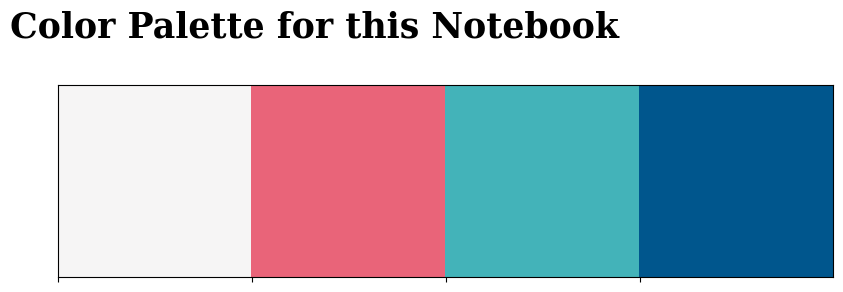

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# color palette for visualizations
colors = ['#f6f5f5','#E96479','#43b3b9','#00568D']
palette = sns.color_palette( palette = colors)

sns.palplot(palette, size =2.5)
plt.text(-0.75,-0.75,'Color Palette for this Notebook', {'font':'serif', 'size':25, 'weight':'bold'})
plt.show()

# Visualize Data

## Show distribution

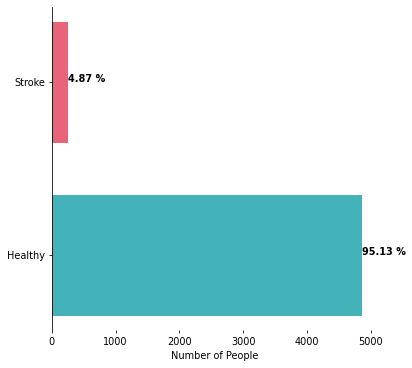

In [38]:
# calculate the values for the bars
x = pd.DataFrame(df.groupby(['stroke'])['stroke'].count())
H_dist = round(x.stroke[0]/x.sum()[0]*100,2)
S_dist =round(abs(H_dist-100),2)
dist =[H_dist,S_dist]
# set up the conditions and y-axis positions
conditions = ('Healthy', "Stroke")
y_pos = np.arange(len(conditions))

# set up the plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=70)

# plot the bars
ax.barh([0], x.stroke[0], height=0.7, color=colors[2])
ax.barh([1], x.stroke[1], height=0.7, color=colors[1])

# remove unnecessary spines
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# set the y-ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(conditions)

# set the x-axis label
ax.set_xlabel('Number of People')

# add bar labels
for i, v in enumerate(x.stroke):
    ax.text(v + 1, i, f"{dist[i]} %", color='black', fontweight='bold')


## Visualize distribution of data

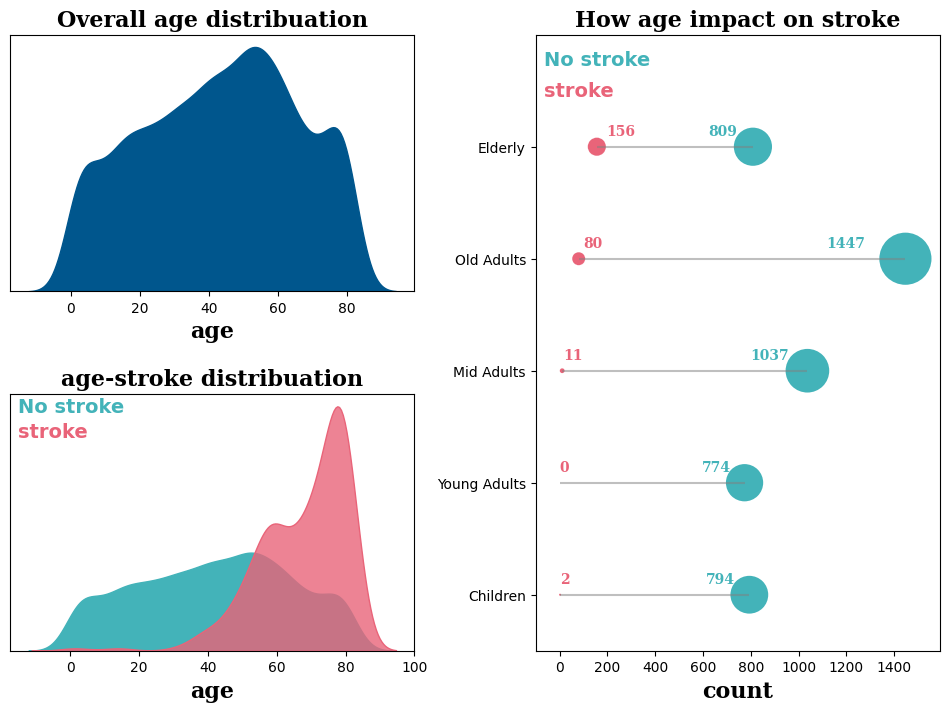

In [39]:
import matplotlib.pyplot as plt
import numpy as np


def plot_distribution(df,label, variable, colors =['#f6f5f5','#E96479','#43b3b9','#00568D'], cat_label=None, figsize=None):
    '''
    Description:
    This function generates distribution plots to compare the impact of a variable on a given label. The plots can show the overall distribution of the variable, how the variable impacts on the label, or the variable's distribution conditioned on the label. The plots can be customized with colors, category labels, and figure size.

    Parameters:

    df: pandas DataFrame object. The input data to plot the distributions.
    label: str. The name of the column in the DataFrame that represents the target variable.
    variable: str. The name of the column in the DataFrame that represents the input variable.
    colors: list of str. Optional. The colors used to plot the distributions. It must have four hexadecimal values. The default value is ['#f6f5f5', '#E96479', '#43b3b9', '#00568D'].
    cat_label: str. Optional. The name of the column in the DataFrame that represents the category label. If it is not None, the function generates the distributions conditioned on the category label. The default value is None.
    figsize: tuple of float. Optional. The size of the figure to show the distributions. It must have two float values. The default value is None.
    Returns:
    None. The function displays the plots.
    '''
    if cat_label!=None:
        X = [(2, 2, 1), (2, 2, (2, 4)), (2, 2, 3)]
        figsize = (12, 8) if figsize is None else figsize
        fig = plt.figure(figsize = figsize, dpi=100)
        for nrows, ncols, plot_number in X:
            ax = plt.subplot(nrows, ncols, plot_number)
            
            if plot_number == 1:
                ax.set_yticks([])
                sns.kdeplot(data = df, x = variable, ax = ax, fill = True, color = colors[3], alpha = 1, )
                ax.set_xlabel(f'{variable}', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
                ax.set_title(f'Overall {variable} distribuation', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

            elif plot_number == (2, 4):
                df_counts = df.groupby([cat_label, label])[label].count().unstack().fillna(0)
                ax.hlines(y=df_counts.index, xmin=df_counts[0], xmax=df_counts[1], color='gray', alpha=0.5)
                sns.scatterplot(y=df_counts.index, x=df_counts[1], s=df_counts[1]*1.1, color=colors[1], ax=ax, alpha=1)
                sns.scatterplot(y=df_counts.index, x=df_counts[0], s=df_counts[0]*1.1, color=colors[2], ax=ax, alpha=1)
                plt.xlim(-100, df_counts.max().max()*1.1)
                plt.ylim(-0.5, len(df_counts.index))
               
                ax.set_xlabel(f'{"count"}', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
                ax.set_ylabel("")
                ax.set_title(f'How {variable} impact on {label}', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
                ax.text(0.02, 0.95, f"No {label}", color=colors[2], fontsize=14, fontweight='bold', transform=ax.transAxes)
                ax.text(0.02, 0.9, f"{label}", color=colors[1], fontsize=14, fontweight='bold', transform=ax.transAxes)
                for i in range(len(df_counts)):

                    ax.text(df_counts[1][i] *1.25, i+0.1, str(df_counts[1][i]), fontdict = {'font':'Serif', 'size':10, 'weight':'bold', 'color': colors[1]})
                    ax.text(df_counts[0][i] *0.77, i+0.1, str(df_counts[0][i]), fontdict = {'font':'Serif', 'size':10, 'weight':'bold', 'color': colors[2]})
                    
            else:
                ax.set_yticks([])
                sns.kdeplot(data = df[df[label] == 0], x = variable,ax = ax, fill = True,  alpha = 1, color = colors[2])
                sns.kdeplot(data = df[df[label] == 1], x = variable ,ax = ax, fill = True,  alpha = 0.8, color = colors[1])

                ax.set_xlabel(f'{variable}', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
                ax.set_title(f'{variable}-{label} distribuation', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
                ax.text(0.02, 0.93, f"No {label}", color=colors[2], fontsize=14, fontweight='bold', transform=ax.transAxes)
                ax.text(0.02, 0.83, f"{label}", color=colors[1], fontsize=14, fontweight='bold', transform=ax.transAxes)
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        plt.show()
    else:
        X = [(1, 2, 1), (1, 2, 2)]
        figsize = (12, 4) if figsize is None else figsize
        fig = plt.figure(figsize=figsize, dpi=100)
        for nrows, ncols, plot_number in X:
            ax = plt.subplot(nrows, ncols, plot_number)
            if plot_number == 1:
                ax.set_yticks([])
                sns.kdeplot(data = df, x = variable, ax = ax, fill = True, color = colors[3], alpha = 1, )
                ax.set_xlabel(f'{variable}', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
                ax.set_title(f'Overall {variable} distribuation', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

            else:
                ax.set_yticks([])
                sns.kdeplot(data = df[df[label] == 0], x = variable,ax = ax, fill = True,  alpha = 1, color = colors[2])
                sns.kdeplot(data = df[df[label] == 1], x = variable ,ax = ax, fill = True,  alpha = 0.8, color = colors[1])

                ax.set_xlabel(f'{variable}', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
                ax.set_title(f'{variable}-{label} distribuation', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
                ax.text(0.02, 0.93, f"No {label}", fontdict = {'font':'Serif', 'color': colors[2], 'weight':'bold','size': 14}, transform=ax.transAxes)
                ax.text(0.02, 0.85, f"{label}", fontdict = {'font':'Serif', 'color': colors[1], 'weight':'bold','size': 14}, transform=ax.transAxes)
        plt.subplots_adjust(wspace=0.2, hspace=0.3)
        plt.show()


plot_distribution(df,label="stroke", variable ="age",cat_label ="age_cat")


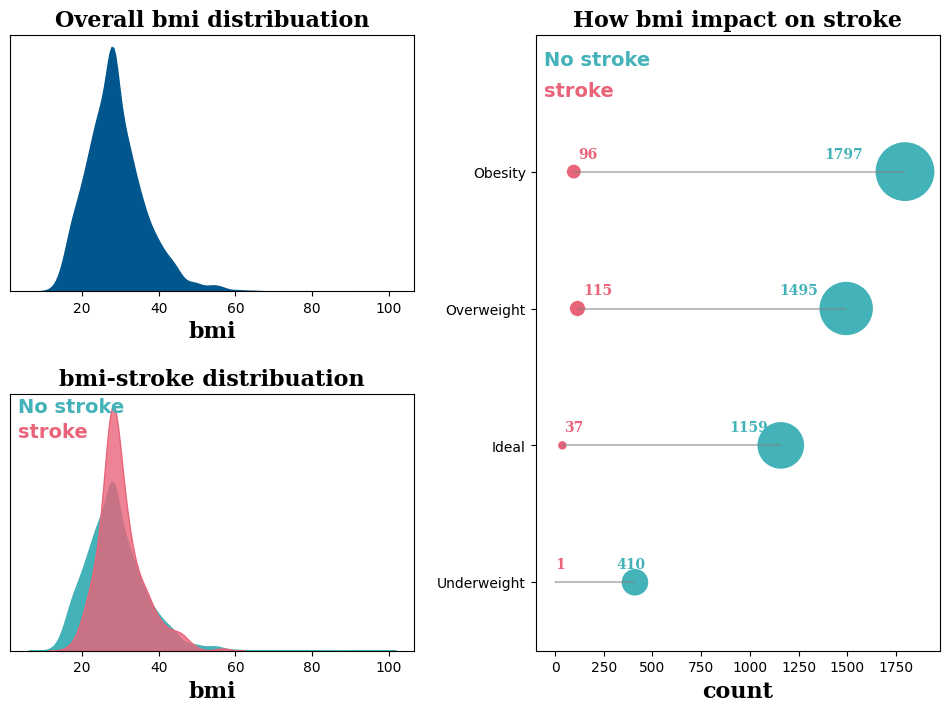

In [40]:
plot_distribution(df,label="stroke", variable ="bmi",cat_label ="bmi_cat")

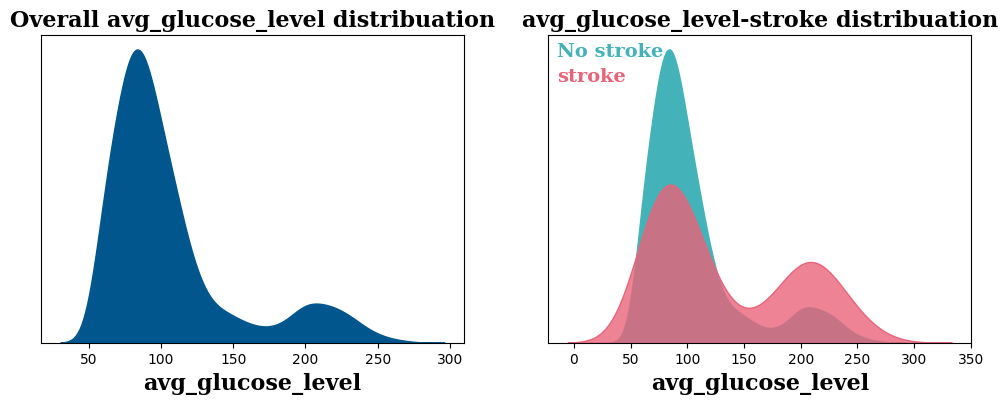

In [41]:
plot_distribution(df,label="stroke", variable ="avg_glucose_level")

## **Gender distribution**

In [43]:
def plot_waffle(df,label,var,colors =['#f6f5f5','#E96479','#43b3b9','#00568D'], icon1="male",icon2=None):
    # Calculate percentage of label for each level of var
    df_var = pd.crosstab(df[var], [df[label]], normalize='index') * 100
    df_var = df_var.round().astype(int)

    # Calculate total count of each level of var
    df_label = pd.crosstab(df[label], [df[var]])

    # Calculate percentage of each level of var
    total_count = df_label.sum(axis=0)
    var_0_per = round(total_count[0] / df_label.sum().sum() * 100)
    var_1_per = round(total_count[1] / df_label.sum().sum() * 100)



    # graphical icon of the plot
    icon2 = icon1 if icon2 is None else icon2

    fig = plt.figure(
    FigureClass=Waffle,
    constrained_layout = True,
    dpi=100,
    plots={
        121: {
            'rows':10,
            'columns': 10,
            'values': [df_var.iloc[1][0],df_var.iloc[1][1]],  # Convert actual number to a reasonable block number
            'colors': [colors[2],colors[1]],
            'vertical' : True,
            'icons' : icon1,
            'interval_ratio_y': 0.8,
            'interval_ratio_x': 0.8,
            'icon_size':25,
        },
        122: {
            'rows':10,
            'columns': 10,
            'values': [df_var.iloc[0][0],df_var.iloc[0][1]],
            'colors': [colors[2],colors[1]],
            'vertical' : True,
            'icons' : icon2,
            'interval_ratio_y': 0.8,
            'interval_ratio_x': 0.8,
            'icon_size':25,
        },
    },
    figsize=(8, 8)
    )

    plt.subplots_adjust(wspace=40) # Adjust the horizontal spacing between subplots
    fig.text(0.02, 0.83, f'{var} Risk for {label}', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
    # Below text
    fig.text(0.21, 0.22, f'{df_var[0][1]}%', {'font':'Serif', 'size':20,'weight':'bold' ,'color':colors[2]},alpha = 1,)
    fig.text(0.70, 0.22, f'{df_var[0][0]}%', {'font':'Serif', 'size':20,'weight':'bold', 'color':colors[2]}, alpha = 1)
    # Above text
    fig.text(0.19, 0.75, f'{list(df[var].unique())[0]} ({var_1_per}%)', {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,)
    fig.text(0.65, 0.75, f'{list(df[var].unique())[1]} ({var_0_per}%)', {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5)

    fig.text(-0.12, 1.29, f"No {label}", fontdict = {'font':'Serif', 'color': colors[2], 'weight':'bold','size': 14}, transform=ax.transAxes)
    fig.text(-0.12, 1.22, f"{label}", fontdict = {'font':'Serif', 'color': colors[1], 'weight':'bold','size': 14}, transform=ax.transAxes)

    plt.show()


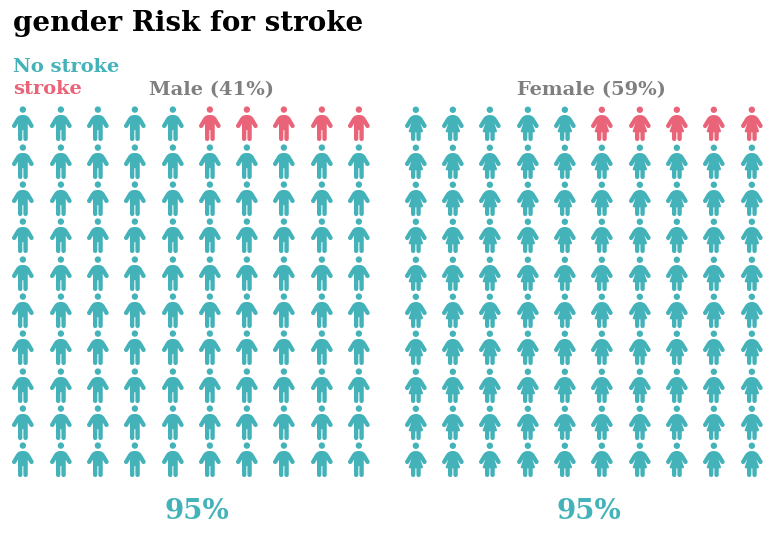

In [44]:
label = "stroke"
var = "gender"
# Risk on stroke based on gender
plot_waffle(df,label,var,icon1="male",icon2="female")
#The graph presented indicates that 59% of the dataset include male individuals, while 41% females. 
#Notably, the incidence of stroke in males is 5%, a finding that is consistent with the 5% stroke incidence observed among females. 
#Based on these results, it can be inferred that there is no difference between the likelihood of having a stroke based solely on gender.


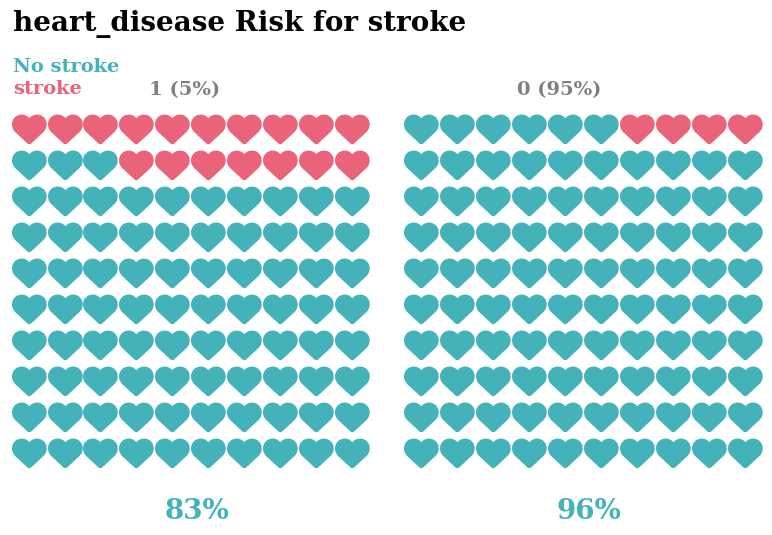

In [45]:
label = "stroke"
var = "heart_disease"
# Risk on stroke based on having a heart diease
plot_waffle(df,label,var,icon1="heart")
# The graph presented indicates that 5% of the dataset include individuals´who had a history of heart disease, while 95% did not. 
# Furthermore, the data indicates that individuals who have previously been diagnosed with heart disease 
# are at a significantly greater risk of experiencing a stroke, with 17 % of them had stroke.
# This is much higher than the corresponding rate of 4% observed in the group with no history of heart disease, 
# representing a 13 percentage point difference.

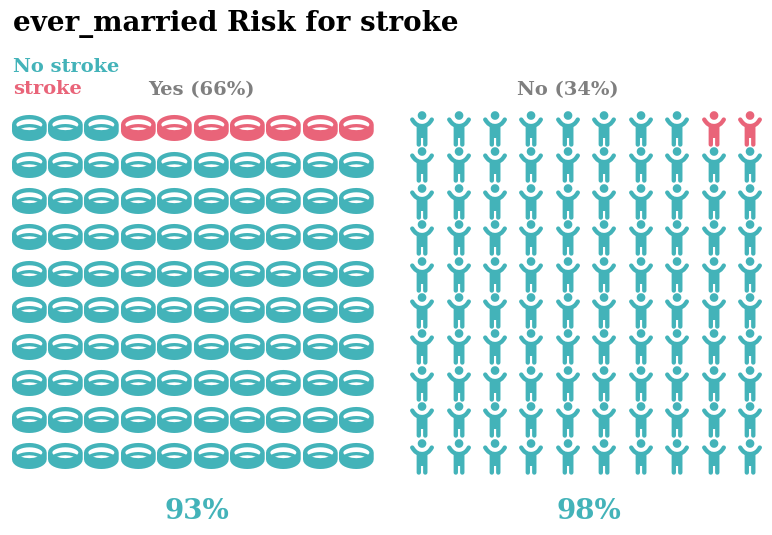

In [46]:
label = "stroke"
var = "ever_married"
# Risk on stroke based on gender
plot_waffle(df,label,var,icon1="ring",icon2="child-reaching")
# The graph presented indicates that 66% of the dataset include individuals who were married, while 34% were not. 
# The data indicates that individuals who are married are at a greater risk of experiencing a stroke, 
# with 7 % of them had stroke.
# This is higher than the corresponding rate of 2% observed in the group with no who are singles. 

## **Relationship between two variables based on Label: Stroke**

In [47]:
def plot_percentage_relationship(df, label, var1, var2, colors =['#f6f5f5','#E96479','#43b3b9','#00568D']):
   # Define colors

    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12,6), dpi=100)

    col1 = ["gray", colors[1]]
    col2 = ["gray", colors[2]]

    dfs = []
    for i in range(2):
        dfs.append(np.round(pd.crosstab(df[df[label]==i][var1], [df[df[label]==i][var2]], normalize='index'),2))

    ax0.text(0, -0.1, f'{label} percentage', {'font': 'serif', 'color': "#fe346e", 'size': 16}, alpha=0.9)
    ax1.text(0, -0.1, f'No {label} percentage', {'font': 'serif', 'color': "#512b58", 'size': 16}, alpha=0.9)

    if dfs[0].shape[0]!=dfs[1].shape[0]:
      # Only use the common indices in both dataframes using intersection
      common_index = dfs[0].index.intersection(dfs[1].index)
      dfs[0] = dfs[0].reindex(common_index)
      dfs[1] = dfs[1].reindex(common_index)


    # Choose df_1
    sns.heatmap(ax=ax0, data=dfs[1], linewidths=0,
                square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, cmap=col1,
                annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9)

    # Choose df_0
    sns.heatmap(ax=ax1, data=dfs[0], linewidths=0,
                square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, cmap=col2,
                annot=True, fmt='1.0%', annot_kws={"fontsize": 14}, alpha=0.9)

    #fig.suptitle(f'Distribution of {label} with {var1} & {var2}', fontdict={'font':'Serif', 'color':'black', 'weight':'bold','size':80})
    ax0.text(0, -0.4, f'Distribution of {label} with {var1} & {var2}', {'font':'Serif', 'color':'black', 'weight':'bold','size':20})

    # Change the font size of x and y labels on both axes
    ax0.set_xlabel(var2, fontdict={'font':'serif', 'color':'black', 'size':14})
    ax0.set_ylabel(var1, fontdict={'font':'serif', 'color':'black', 'size':14})
    ax1.set_xlabel(var2, fontdict={'font':'serif', 'color':'black', 'size':14})

    #fig.tight_layout(pad=2.0, w_pad=0.5, h_pad=0.5)
    ax1.axes.get_yaxis().set_visible(False)
    fig.show()

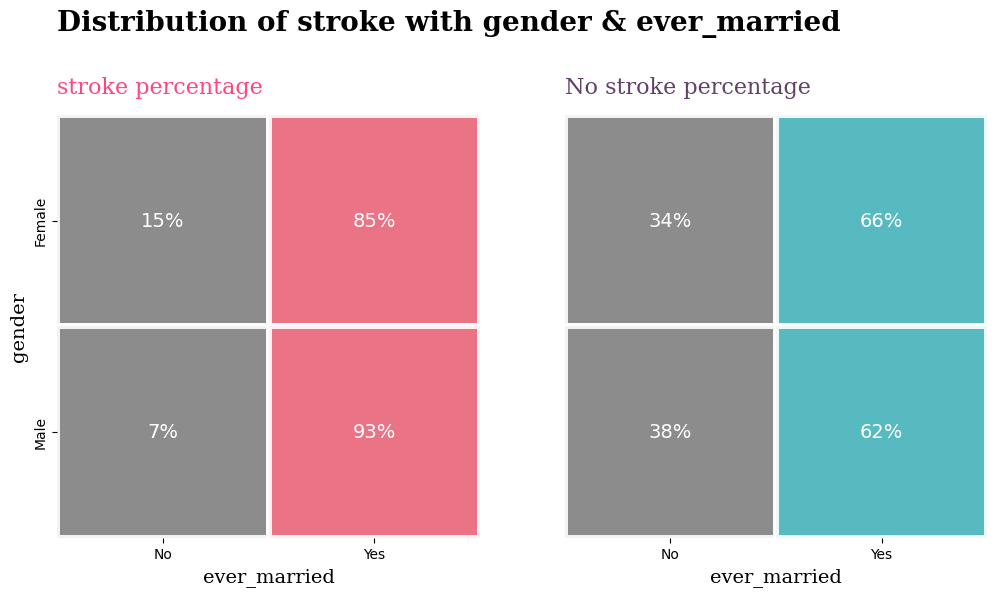

In [48]:
label = "stroke"
var1 = "gender"
var2 = "ever_married"
plot_percentage_relationship(df, label, var1, var2)

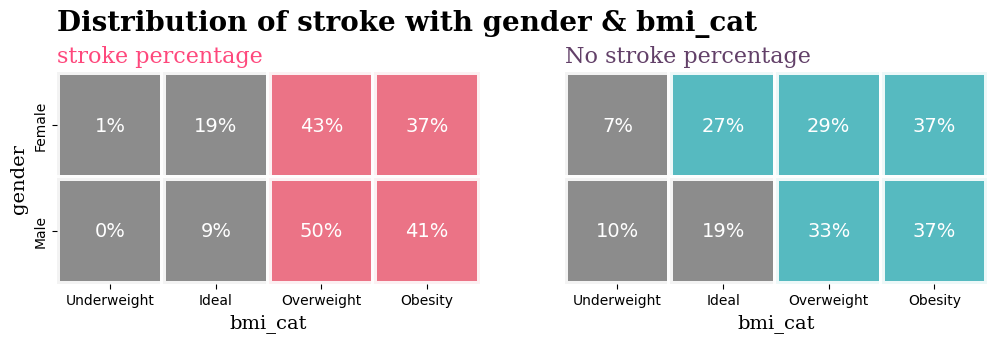

In [49]:
label = "stroke"
var1 = "gender"
var2 = "bmi_cat"
plot_percentage_relationship(df, label, var1, var2,)

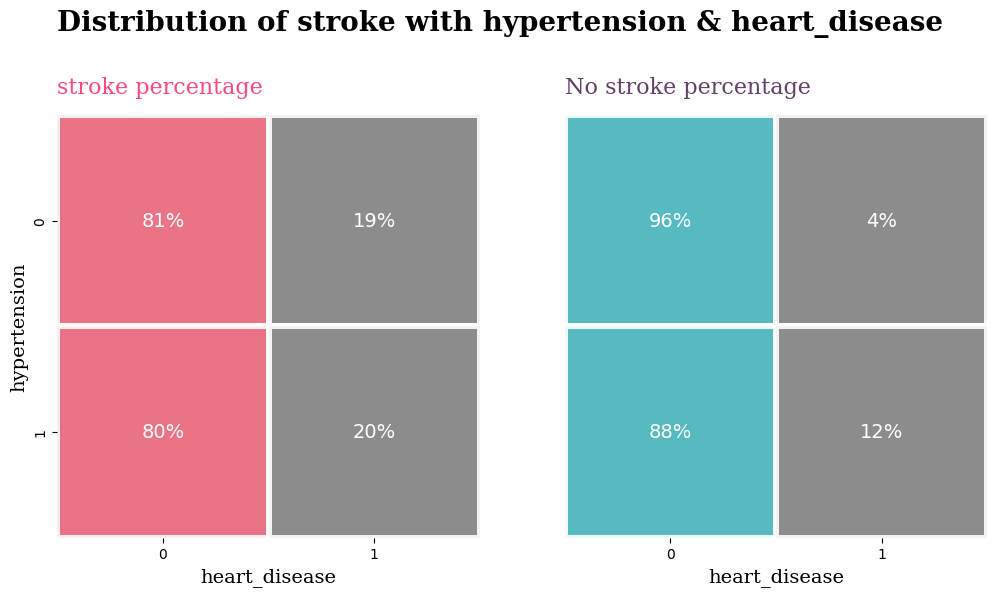

In [50]:
label = "stroke"
var1 = "hypertension"
var2 = "heart_disease"
plot_percentage_relationship(df, label, var1, var2)

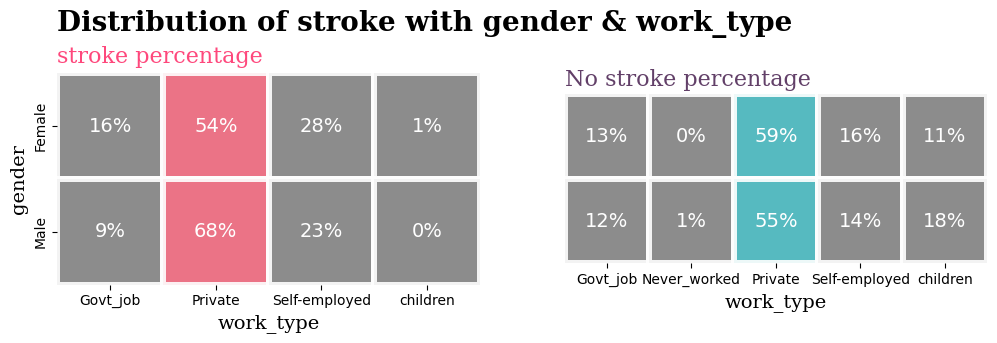

In [51]:
label = "stroke"
var1 = "gender"
var2 = "work_type"
plot_percentage_relationship(df, label, var1, var2)

# Plot correlation

In [52]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
def plot_corelation(df, colors = ['#f6f5f5','#E96479','#43b3b9','#00568D'], fig_plot='corr_matrix'):
    """
    Label encodes ordinal categorical features and normalizes numerical features using StandardScaler. Then, computes 
    the correlation matrix and plots it as a heatmap or a cluster map based on the input argument fig_plot.

    Parameters:
    -----------
    df : pandas dataframe
        A copy of the input dataframe containing the features to be encoded and normalized.
    colors : list
        A list of three colors to create the colormap for the heatmap or cluster map.
    fig_plot : str, default='corr_matrix'
        Determines the type of plot to be displayed. If 'corr_matrix', a heatmap will be shown, else a clustermap
        will be shown.

    Returns:
    --------
    None

    """
    df_copy = df.copy()
    
    # Initialize a StandardScaler and a LabelEncoder
    ss = StandardScaler()
    le = LabelEncoder()
    
    # Label encode all columns in the dataframe
    cols = df_copy.columns
    for col in cols:
        df_copy[col] = le.fit_transform(df_copy[col])
    
    # Normalize the numerical features in the dataframe using StandardScaler
    df_copy[cols] = ss.fit_transform(df_copy[cols])

    # Compute the correlation matrix and round it to 3 decimal places
    #df_copy_corr = np.round(df_copy.drop(columns=['id']).corr(), 3)
    df_copy_corr = np.round(df_copy.drop(columns=['id',"stroke"]).corr(), 3)
    
    # Define the color scheme for the heatmap or cluster map
    colors = [colors[0], colors[2], colors[1]]
    
   
    # Create the colormap for the heatmap or cluster map
    colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
    
    # If fig_plot is 'corr_matrix', plot a heatmap of the correlation matrix
    if fig_plot=="corr_matrix":
        # Create a boolean mask to hide the upper triangle of the correlation matrix
        mask = np.zeros_like(df_copy_corr)
        mask[np.triu_indices_from(mask)] = True

        # Set plot size and resolution
        fig, ax = plt.subplots(figsize=(12,6), dpi=100)
        #plt.figure(figsize=(12,6), dpi=100)

        # Plot the heatmap of the correlation matrix
        sns.heatmap(df_copy_corr, mask=mask, cmap=colormap, center=0, annot=True)

        # Set plot properties and display it
        ax.text(2,0, 'Correlation Map of Features',{'font':'serif', 'size': 22, 'weight':'bold'}, alpha = 0.9)
        plt.show()
        
    
    # If fig_plot is not 'corr_matrix', plot a cluster map of the correlation matrix
    elif fig_plot=="corr_cluster":
      
        g = sns.clustermap(df_copy_corr, annot=True, fmt='0.2f',
                           cbar=False, cbar_pos=(0,0,0,0), linewidth=0.5,
                           cmap=colormap, dendrogram_ratio=0.1, figsize=(8,8),
                           annot_kws={'font':'serif', 'size':10, 'color':'k'})
        # Set y-axis tick labels and font properties
        g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=10, fontfamily='Serif', 
                                     fontweight='bold', alpha=0.8)
        # Set x-axis tick labels and font properties
        g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=10, fontfamily='Serif',
                                     fontweight='bold', alpha=0.8)
        
        g.fig.text(0.1,1.0,'Cluster map of Correlation Matrix',{'font':'serif', 'size':22, 'weight':'bold'})


    else:
      raise("Invalid input of fig_plot: has to be either corr_matrix or corr_cluster")


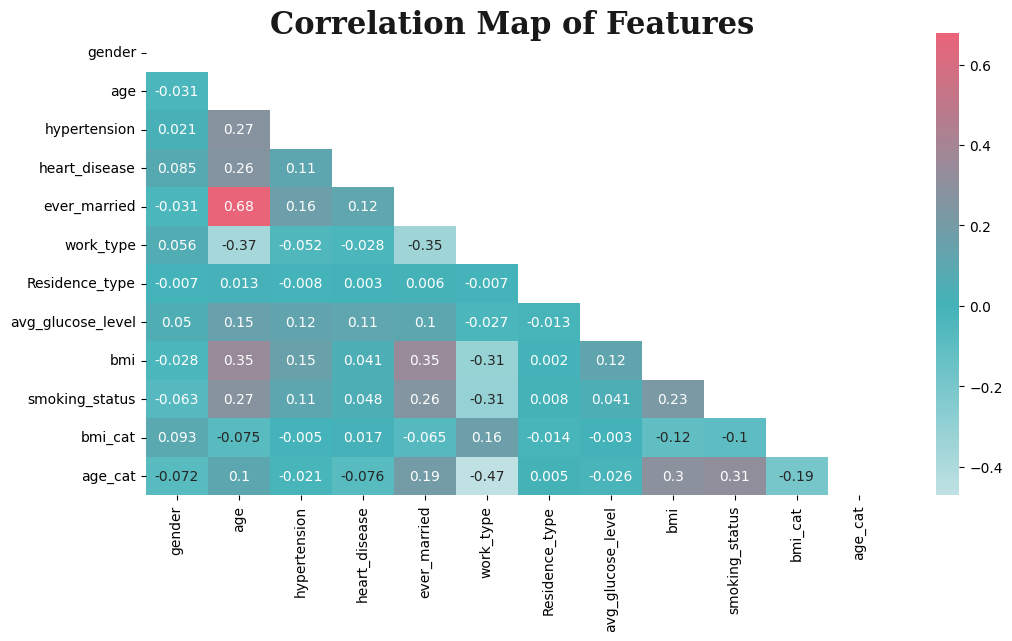

In [53]:
plot_corelation(df, fig_plot='corr_matrix')
# Highler correlated positive correlation can be found at age, marriage, and a bit with bmi.
# While it seems that work type are negatively correlated 

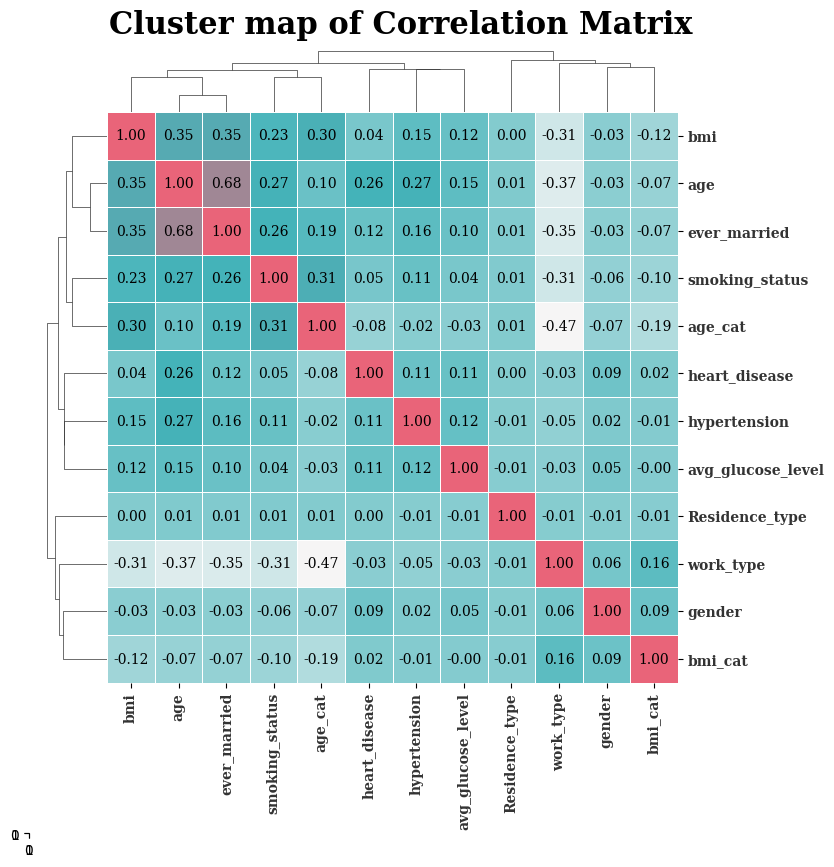

In [54]:
plot_corelation(df, fig_plot='corr_cluster')
# the cluster map has clustered features like bmi, age and married with a higher risk of getting a stroke. 
# The dendrograms indicatesthat the depenency of these features